<a href="https://colab.research.google.com/github/TuanLBT/AI_learning/blob/main/drive_nang_cao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tạo set data (chưa split)

In [2]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array
from keras.utils import load_img

In [3]:
folder='/content/drive/MyDrive/Anh_lop/'

In [4]:
photos,labels = list(),list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Tuan_'):
    output=1.0
  if file.startswith('BINH_'):
    output=2.0
  if file.startswith('Chuong_'):
    output=3.0
  if file.startswith('Dong_'):
    output=4.0
  if file.startswith('Hieu_'):
    output=5.0
  if file.startswith('Nam_'):
    output=6.0
  if file.startswith('Phi_'):
    output=7.0
  if file.startswith('Phong_'):
    output=8.0
  if file.startswith('Thang_'):
    output=9.0
  if file.startswith('Thanh_'):
    output=10.0
  if file.startswith('Tri_'):
    output=11.0
  if file.startswith('Tung_'):
    output=12.0
  photo = load_img(folder+file,target_size=(30,40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)


In [5]:
photos = asarray(photos)
labels = asarray(labels)
save('/content/drive/MyDrive/photo_lop.npy',photos)
save('/content/drive/MyDrive/label_lop.npy',labels)

In [6]:
photos.shape

(722, 30, 40, 3)

In [7]:
labels.shape

(722,)

split data thành 70% train, 30% test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_x, test_x, train_y,  test_y = train_test_split(photos,labels, test_size=0.3, train_size=0.7)
#test_x, test_y = train_test_split(photos,labels, test_size=0.3)

In [10]:
train_x.shape

(505, 30, 40, 3)

In [11]:
test_x.shape

(217, 30, 40, 3)

scale lại data

In [12]:
train_x = train_x.reshape([505,30,40,3])
train_x = train_x.astype('float32')
train_x = train_x/255

In [13]:
test_x = test_x.reshape([217,30,40,3])
test_x = test_x.astype('float32')
test_x = test_x/255

In [14]:
from keras.utils import to_categorical
y_train = to_categorical(train_y)
y_test = to_categorical(test_y)

In [15]:
train_x.shape

(505, 30, 40, 3)

In [16]:
y_train.shape

(505, 13)

tạo mô hình CNN

In [17]:
from keras import Sequential,Model,Input
from keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D,Normalization
from keras.optimizers import Adam

In [18]:
batch_size = 100
epochs = 10
classes = 12

In [19]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(30,40,3),padding='same'))

In [20]:
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))


model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [21]:
model.add(Flatten())

In [22]:
model.add(Dense(200,activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(200,activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(13,activation='softmax'))


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                    

In [24]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

In [25]:
train = model.fit(train_x,y_train,batch_size=batch_size,epochs=epochs,verbose=1)
test_loss, test_acc = model.evaluate(test_x, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

Epoch 1/10
6/6 [==============================] - 9s 37ms/step - loss: 2.4773 - accuracy: 0.1089
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 2.1434 - accuracy: 0.3168
Epoch 3/10
6/6 [==============================] - 0s 7ms/step - loss: 1.5892 - accuracy: 0.5465
Epoch 4/10
6/6 [==============================] - 0s 7ms/step - loss: 0.9178 - accuracy: 0.7465
Epoch 5/10
6/6 [==============================] - 0s 7ms/step - loss: 0.6890 - accuracy: 0.8099
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 0.4994 - accuracy: 0.8495
Epoch 7/10
6/6 [==============================] - 0s 7ms/step - loss: 0.3403 - accuracy: 0.8931
Epoch 8/10
6/6 [==============================] - 0s 7ms/step - loss: 0.2488 - accuracy: 0.9307
Epoch 9/10
6/6 [==============================] - 0s 8ms/step - loss: 0.1957 - accuracy: 0.9406
Epoch 10/10
7/7 [==============================] - 1s 42ms/step - loss: 0.0607 - accuracy: 0.9862
Accuracy: 0.9861751198768616
Loss: 0.

In [27]:
model.save('/content/drive/MyDrive/face_detection.h5')

1/1 [==============================] - 0s 21ms/step
[6]
Đây là Nam


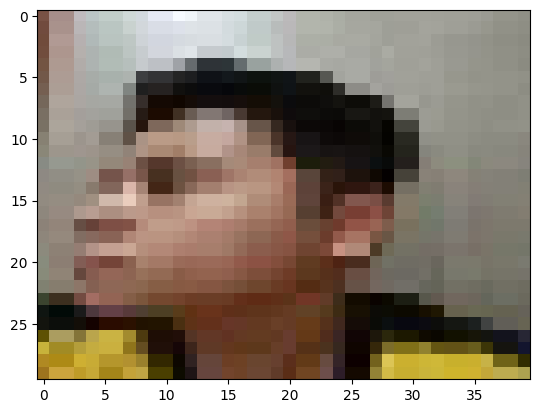

In [32]:
#test mo hinh
from keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/drive/MyDrive/Anh_lop/Nam_11.jpg',target_size=(30,40,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,30,40,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img),axis=-1)
print(a)
if(a == 1):
  print("Đây là Tuấn")
if (a == 2):
  print("Đây là Bình")
if (a == 3):
  print("Đây là Chương")
if (a == 4):
  print("Đây là Chương")
if (a == 5):
  print("Đây là Hiếu")
if (a == 6):
  print("Đây là Nam")
if (a == 7):
  print("Đây là Phi")
if (a == 8):
  print("Đây là Phong")
if (a == 9):
  print("Đây là Thắng")
if (a == 10):
  print("Đây là Thanh")
if (a == 11):
  print("Đây là Trí")
if (a == 12):
  print("Đây là Tùng")